In [1]:
#edit only this tab
#give the folder path of the match
path = """C:\\Users\\koushik.r\\Documents\\open-data-master\\data\\events\\"""
home_team = 'Espanyol'
away_team = 'Barcelona'

In [2]:
import json
import os
import codecs
from pandas.io.json import json_normalize
import numpy as np
#import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
#import squarify
from functools import reduce

Xg_req = pd.DataFrame(data=None)
for filename in (os.listdir(path)):
   #print(filename)
#filename = '69275.json' # remove the comment line to work for this match
with codecs.open("%s" % path + filename,encoding='utf-8') as data_file:    
    data = json.load(data_file)
    df = pd.DataFrame(data=None)
        
    df = json_normalize(data, sep = "_")
        
        #df =  df[(df['type_name'] == "Shot")]
        #df = df.loc[:,['location','shot_body_part_id','shot_end_location','shot_one_on_one','shot_technique_id','shot_type_id','under_pressure','shot_outcome_id']]
        #print(df.shape)
Xg_req = Xg_req.append(df,ignore_index=True,sort=False)
        #df.drop(df.index, inplace=True)
        
print("done")
df = Xg_req

done


In [3]:
#type_id=30 is pass event AND type_id=19 is substitution event

pass_m = df.query('type_id == 30')
substitution = df.query('type_id == 19')
#pass_m = df.query('type_name == pass')


In [4]:
#this cell is WIP
substitution_home = set()
substitution_home = substitution[substitution.team_name == home_team]
substitution_home = substitution_home['substitution_replacement_name'].unique()
substitution_away = set()
substitution_away = substitution[substitution.team_name == away_team]
substitution_away = substitution_away['substitution_replacement_name'].unique()
print(substitution_away)
print(substitution_home)

['Javier Alejandro Mascherano' 'Seydou Kéita' 'Bojan Krkíc Pérez']
['Jesús Alberto Dátolo' 'Jordi Amat Maas' 'David García De La Cruz']


In [5]:
# to get 

home_player = pass_m[(pass_m.team_name == home_team)] 
home_team_list = set()
home_team_list = home_player['player_name'].unique()
#print(substitution_belgium)
#belgium_list = [player for player in belgium_list if player not in substitution_belgium]
#belgium_list.remove([x for x in substitution_belgium])#belgium_list - substitution_belgium
home_player =pass_m['player_name'].isin(home_team_list)
pass_home = pass_m[home_player] #contains 11 players of home team

away_player = pass_m[(pass_m.team_name == away_team)] 
away_list = away_player['player_name'].unique()
#away_list = away_list - substitution_brazil
away_player = pass_m['player_name'].isin(away_list)
pass_away = pass_m[away_player]

In [6]:
pass_home.head()

,50_50_outcome_id,50_50_outcome_name,bad_behaviour_card_id,bad_behaviour_card_name,ball_receipt_outcome_id,ball_receipt_outcome_name,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,...,substitution_replacement_id,substitution_replacement_name,tactics_formation,tactics_lineup,team_id,team_name,timestamp,type_id,type_name,under_pressure
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,214,Espanyol,00:00:00.738,30,Pass,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,214,Espanyol,00:00:02.511,30,Pass,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,214,Espanyol,00:00:09.581,30,Pass,True
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,214,Espanyol,00:00:18.784,30,Pass,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,214,Espanyol,00:00:20.122,30,Pass,True


In [12]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="white", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="white")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="white")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="white")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="white")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="white")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

In [ ]:
players = home_team_list
#['Thibaut Courtois','Jan Vertonghen','Vincent Kompany','Toby Albertine Maurits Alderweireld','Thomas Meunier','Nacer Chadli','Axel Witsel','Marouane Fellaini-Bakkioui','Eden Hazard','Kevin De Bruyne','Romelu Lukaku Menama']
fig=plt.figure() #set up the figures
from matplotlib import rcParams
plt.style.use('dark_background')
fig.set_size_inches(16, 9)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
for player in players:
    x_avg = 0
    y_avg = 0
    touches = 0
    if player not in substitution_home: 
        play_temp = pass_home[(pass_home.player_name == player)]
    #print(play_temp.location, players[player])
        for i in range(len(play_temp)):
            touches+=1
            y_loc = -2*(play_temp.iloc[i]['location'][1] - 40) + play_temp.iloc[i]['location'][1] # y - y' = -2(y' +c) reflection of a point
            #https://math.stackexchange.com/questions/1013230/how-to-find-coordinates-of-reflected-point
            x_avg = x_avg + play_temp.iloc[i]['location'][0]
            y_avg = y_avg + y_loc
        x_avg = x_avg/len(play_temp)
        y_avg = y_avg/len(play_temp)
    #print(x_avg,y_avg,players[player])
        ax.scatter(x_avg, y_avg, s= (3 * touches))  
        ax.annotate(player, (x_avg, y_avg))
plt.show()

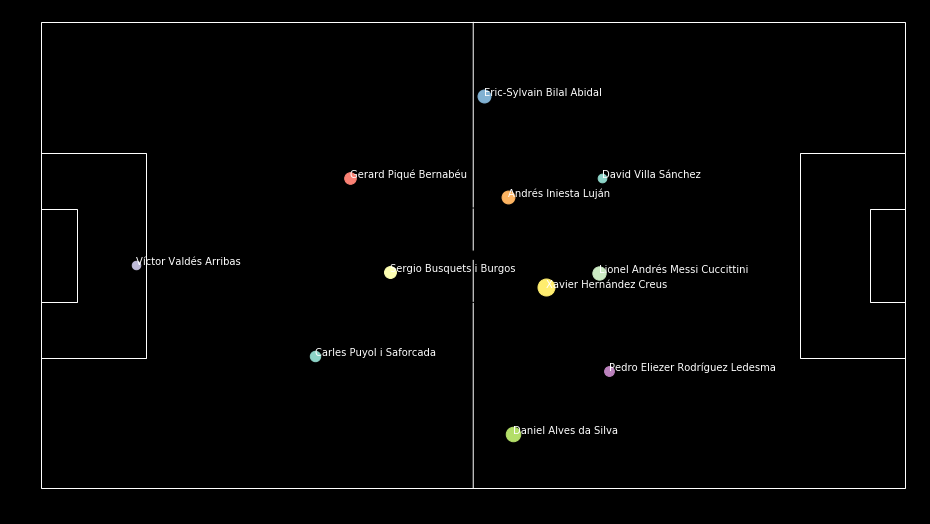

In [11]:
players = away_list #['Alisson Ramsés Becker','Fágner Conserva Lemos','Fernando Luiz Rosa','Gabriel Fernando de Jesus','João Miranda de Souza Filho','José Paulo Bezzera Maciel Júnior','Marcelo Vieira da Silva Júnior','Neymar da Silva Santos Junior','Philippe Coutinho Correia','Thiago Emiliano da Silva','Willian Borges da Silva']
fig=plt.figure() #set up the figures
from matplotlib import rcParams
plt.style.use('dark_background')
fig.set_size_inches(16,9)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
y_loc =0
for player in players:
    x_avg = 0
    y_avg = 0
    touches = 0
    if player not in substitution_away:
    #print(players[player])
        play_temp = pass_away[(pass_away.player_name == player)]
    #print(play_temp.location, players[player])
        for i in range(len(play_temp)):
            touches+=1
            #y_loc = (play_temp.iloc[i]['location'][1] + 40 ) %80
            y_loc = -2*(play_temp.iloc[i]['location'][1] - 40) + play_temp.iloc[i]['location'][1] 
            x_avg = x_avg + play_temp.iloc[i]['location'][0]
            y_avg = y_avg + y_loc
        x_avg = x_avg/len(play_temp)
        y_avg = y_avg/len(play_temp)
    #print(x_avg,y_avg,players[player])
        ax.scatter(x_avg, y_avg, s= (3 *touches ))  
        ax.annotate(player, (x_avg, y_avg))
plt.show()